#### Hierarchical Clustering

In [48]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
# Importing the dataset
df = pd.read_csv('marketing_prep.csv', sep=';')

Необхідно виконати певні перетворення данних. Необхідно додати новий стовпець до нашого датафрейму. В даному стовпці буде записано вихідне значення порівняння витрат користувачів на вино з сумою значень трат користувача на інші категорії товарів. Оскільки на етапі підготовки даних, виконувалось логарифмування даних, то при порівнянні та сумуванні даних необхідно скористатись зворотною функцією - еспоненціюванням. Якщо трати на вино користувача будуть більшими, ніж трати на інші продукти, то в стовпці споживачів вина буде записуватись 1, в зворотньому випадку - 0.

In [50]:
df['WineCons']=np.where((np.exp(df['MntWines'])-1) > ((np.exp(df['AllSpends'])-1)-(np.exp(df['MntWines'])-1)), 1, 0)

In [51]:
df

,Age,Education,Marital_Status,Income,Children,Mn_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AllSpends,WineCons
0,63.0,2,2,58138.0,0,9,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,7.388946,0
1,66.0,2,2,46344.0,2,3,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,3.332205,0
2,55.0,2,3,71613.0,0,8,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,6.655440,1
3,36.0,2,3,26646.0,1,2,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,3.988984,0
4,39.0,4,1,58293.0,1,1,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,6.047372,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,53.0,2,1,61223.0,1,6,6.565265,3.784190,5.209486,3.761200,4.779123,5.513429,7.201916,1
2231,74.0,4,3,64014.0,3,6,6.008813,0.000000,3.433987,0.000000,0.000000,2.197225,6.098074,1
2232,39.0,2,0,56981.0,0,1,6.812345,3.891820,5.384495,3.496508,2.564949,3.218876,7.124478,1
2233,64.0,3,3,69245.0,1,1,6.061457,3.433987,5.370638,4.394449,3.433987,4.127134,6.738152,1


Залишимо лише необхідні нам стовпці: вік, рівень освіти, статус, дохід, кіл-сть дітей, місяць здійснення першої покупки та фактор, що демонструє чи є користувачем переважно споживачем вина чи ні. Визначати на які кластери можна поділити споживачів будемо саме за цими факторами.

In [52]:
df=df[['Age', 'Education', 'Marital_Status', 'Income', 'Children', 'Mn_Customer', 'WineCons']]
df

,Age,Education,Marital_Status,Income,Children,Mn_Customer,WineCons
0,63.0,2,2,58138.0,0,9,0
1,66.0,2,2,46344.0,2,3,0
2,55.0,2,3,71613.0,0,8,1
3,36.0,2,3,26646.0,1,2,0
4,39.0,4,1,58293.0,1,1,0
...,...,...,...,...,...,...,...
2230,53.0,2,1,61223.0,1,6,1
2231,74.0,4,3,64014.0,3,6,1
2232,39.0,2,0,56981.0,0,1,1
2233,64.0,3,3,69245.0,1,1,1


In [53]:
df.describe()

,Age,Education,Marital_Status,Income,Children,Mn_Customer,WineCons
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,51.118121,2.393736,1.734676,51655.925727,0.951678,6.471141,0.436242
std,11.698748,1.123827,1.061591,20561.496012,0.751835,3.487212,0.496029
min,24.000000,0.000000,0.000000,1730.000000,0.000000,1.000000,0.000000
25%,43.000000,2.000000,1.000000,35533.500000,0.000000,3.000000,0.000000
50%,50.000000,2.000000,2.000000,51651.000000,1.000000,6.000000,0.000000
75%,61.000000,3.000000,3.000000,68117.500000,1.000000,10.000000,1.000000
max,80.000000,4.000000,4.000000,113734.000000,3.000000,12.000000,1.000000


In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df1 = sc.transform(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Age', 'Education', 'Marital_Status', 'Income', 'Children', 'Mn_Customer', 'WineCons'])

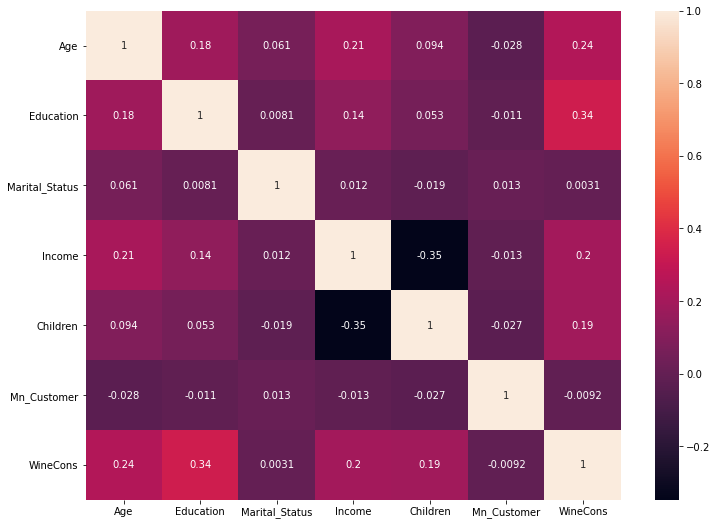

In [8]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

З отриманої кореляційної матриці помітно, що найменша кореляція зі споживачами вина спостерігається у сімейного стану та місяця здійснення першої покупки. Тому можна буде розглянути ще кластеризацію без використання цих змінних

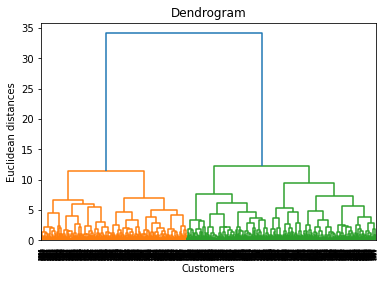

In [9]:
# Using the dendrogram to find the optimal number of clusters
# На всіх змінних
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

З отриманої дендрограми помітно, що оптимальним є виділення 2 кластерів

In [10]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [11]:
# Less features
X = df.iloc[:, [0, 1, 3, 4, 6]]

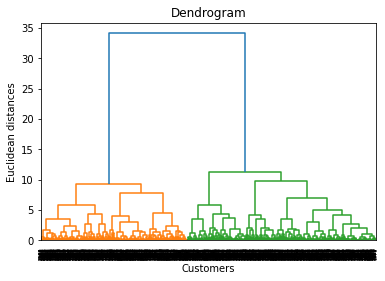

In [12]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Знову оптимальним виявилось виділення 2 кластерів

In [25]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc_opt = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(X)

#### K-Means Clustering

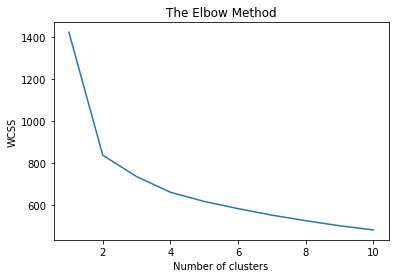

In [14]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Найбільш різке падіння спостерігається в точці 2. Отже, як і у випадку з ієрархічною кластеризацією, оптимальним є виділення 2 кластерів

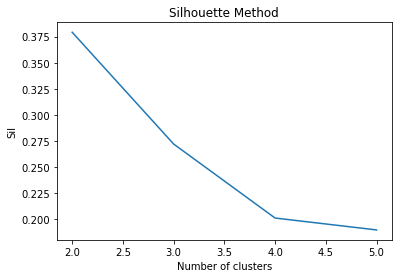

2:0.37920693633705166
3:0.27207391036703515
4:0.2011078203760772
5:0.1897231824345619


In [15]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Найбільше значення спостерігається при виділенні 2 кластерів, отже, відповідно до методу Silhouette оптимальною кількістю кластерів є 2 кластери.

In [18]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Age', 'Education', 'Marital_Status', 'Income', 'Children', 'Mn_Customer', 'WineCons']).round(3)

,Age,Education,Marital_Status,Income,Children,Mn_Customer,WineCons
0,0.542,0.706,0.435,0.487,0.372,0.494,1.0
1,0.439,0.515,0.433,0.414,0.275,0.500,-0.0


Сімейний статус, місяць здійснення першої покупки між кластерами відрізняються менше ніж на 0.01 тому можуть бути видалені при кластеризації

In [19]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

1.0

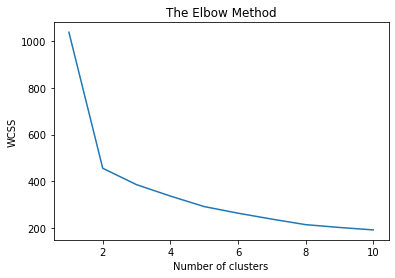

In [20]:
# Using the elbow method to find the optimal number of clusters
# Для вибірки даних з найбільш корельованими змінними
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

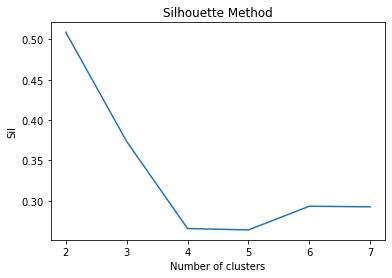

2:0.5087961823784675
3:0.37351327131044365
4:0.26566287277529643
5:0.26395245995879807
6:0.29329182118385055
7:0.29255601847388946


In [21]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 8):
  kmeans = KMeans(n_clusters = k).fit(X)  
  preds = kmeans.fit_predict(X)
  sil.append(silhouette_score(X, preds, metric = 'euclidean'))


plt.plot(range(2, 8), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

За обома критеріями найбільш оптимальною кількістю кластерів є 2

In [23]:
# Fitting K-Means to the dataset
km_opt = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms_opt = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms_opt.cluster_centers_, columns = ['Age', 'Education', 'Income', 'Children', 'WineCons']).round(3)

,Age,Education,Income,Children,WineCons
0,0.542,0.706,0.487,0.372,1.0
1,0.439,0.515,0.414,0.275,-0.0


In [26]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc_opt,km_opt)

1.0

#### SOM

In [27]:
# Less features
X1 = df1[:, [0, 1, 3, 4, 6]]

In [ ]:
#! pip install SimpSOM

In [36]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(18, 25, X1, PBC=True)
net.train(0.01, 10000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!    


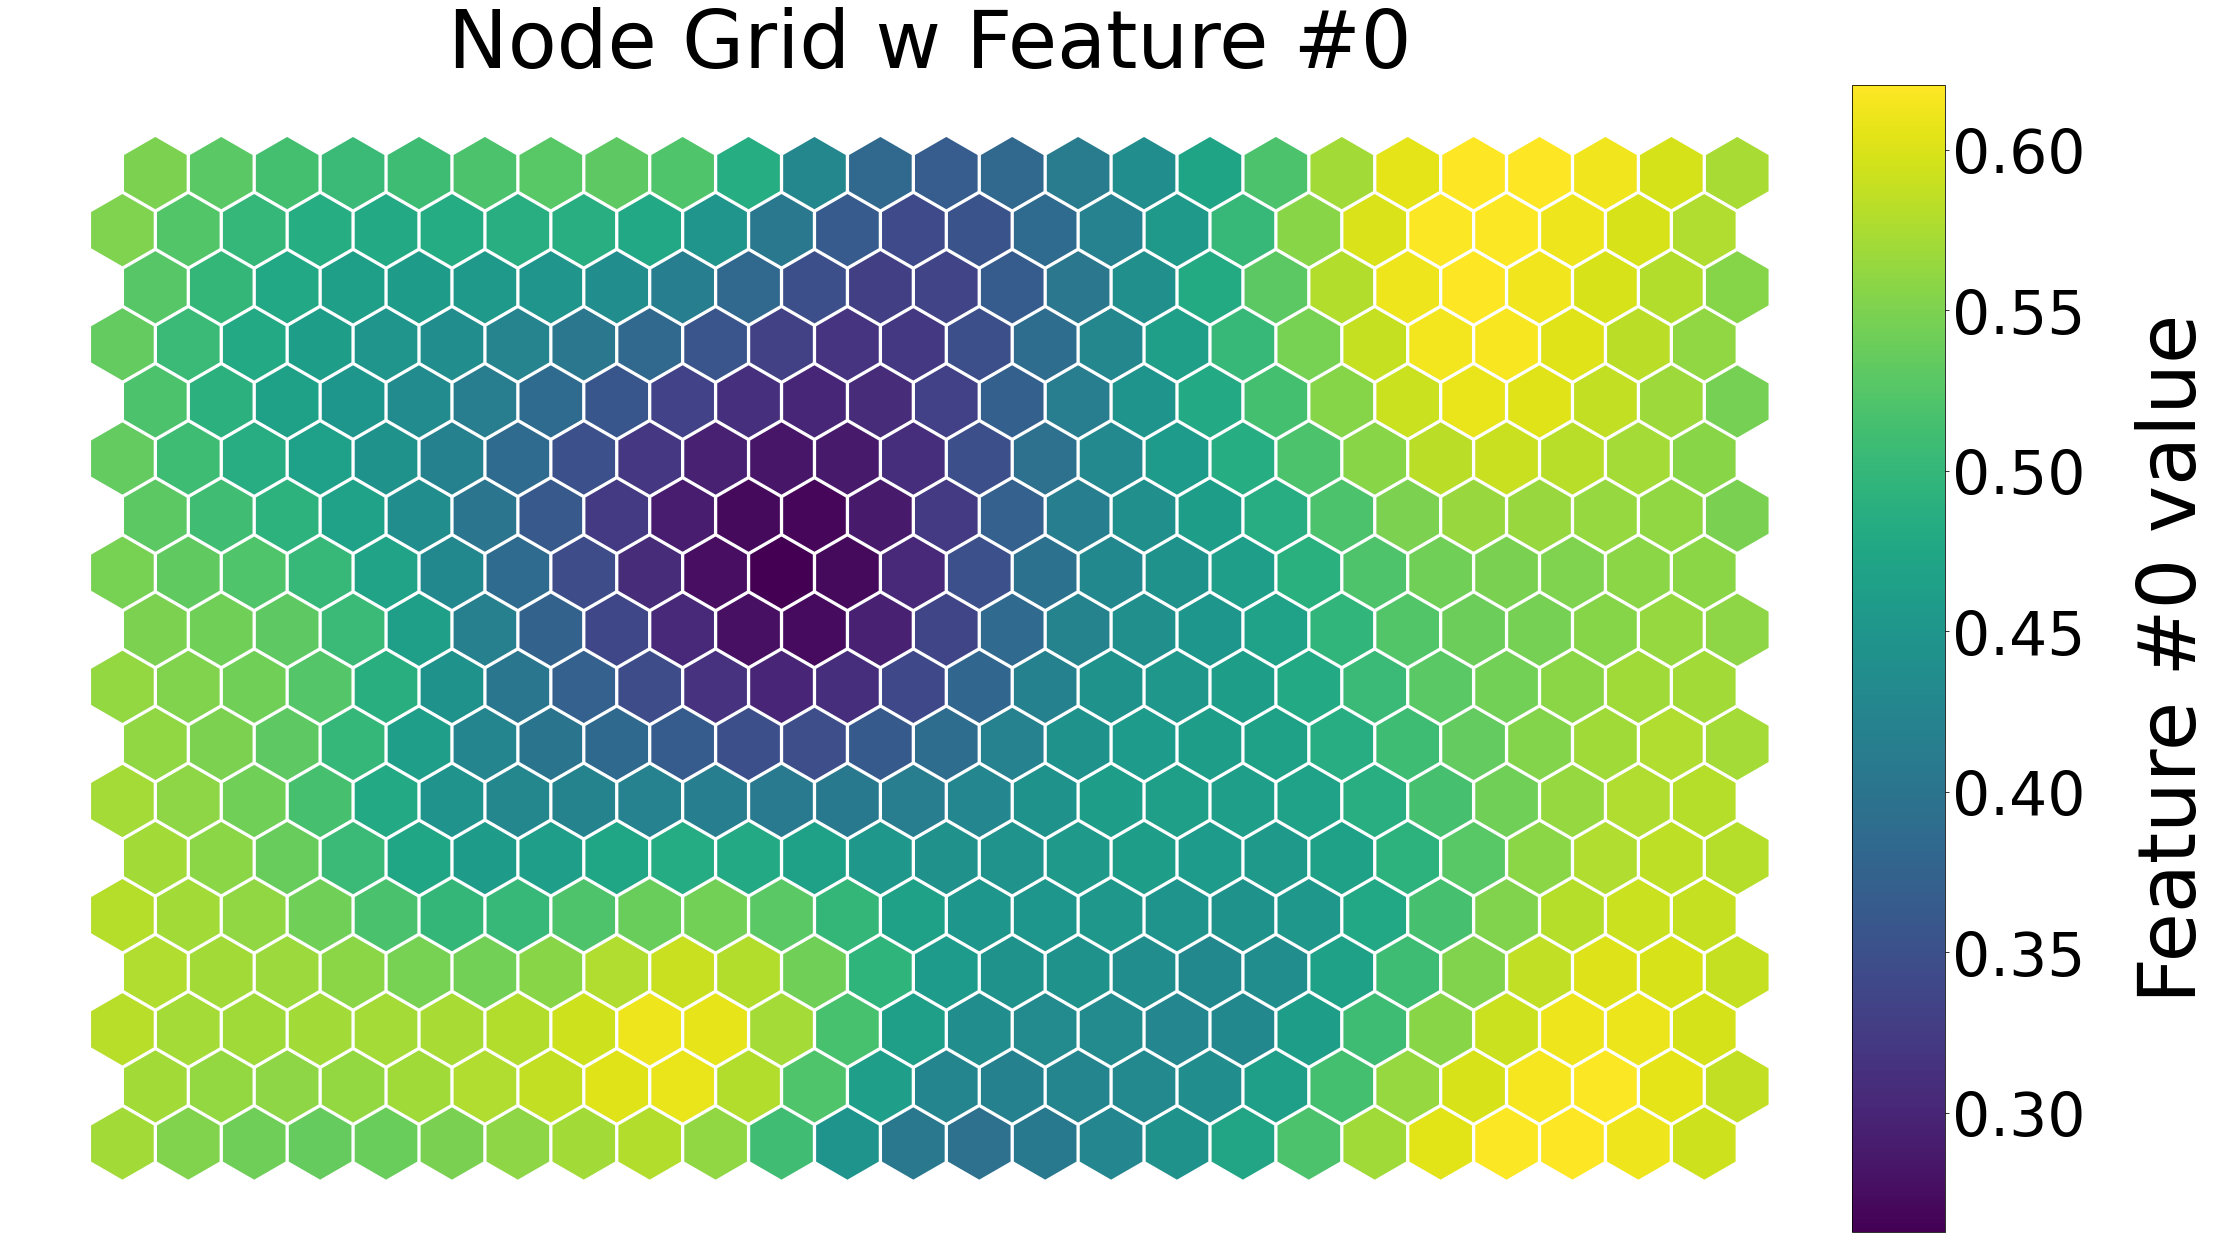

In [37]:
net.nodes_graph(colnum=0)

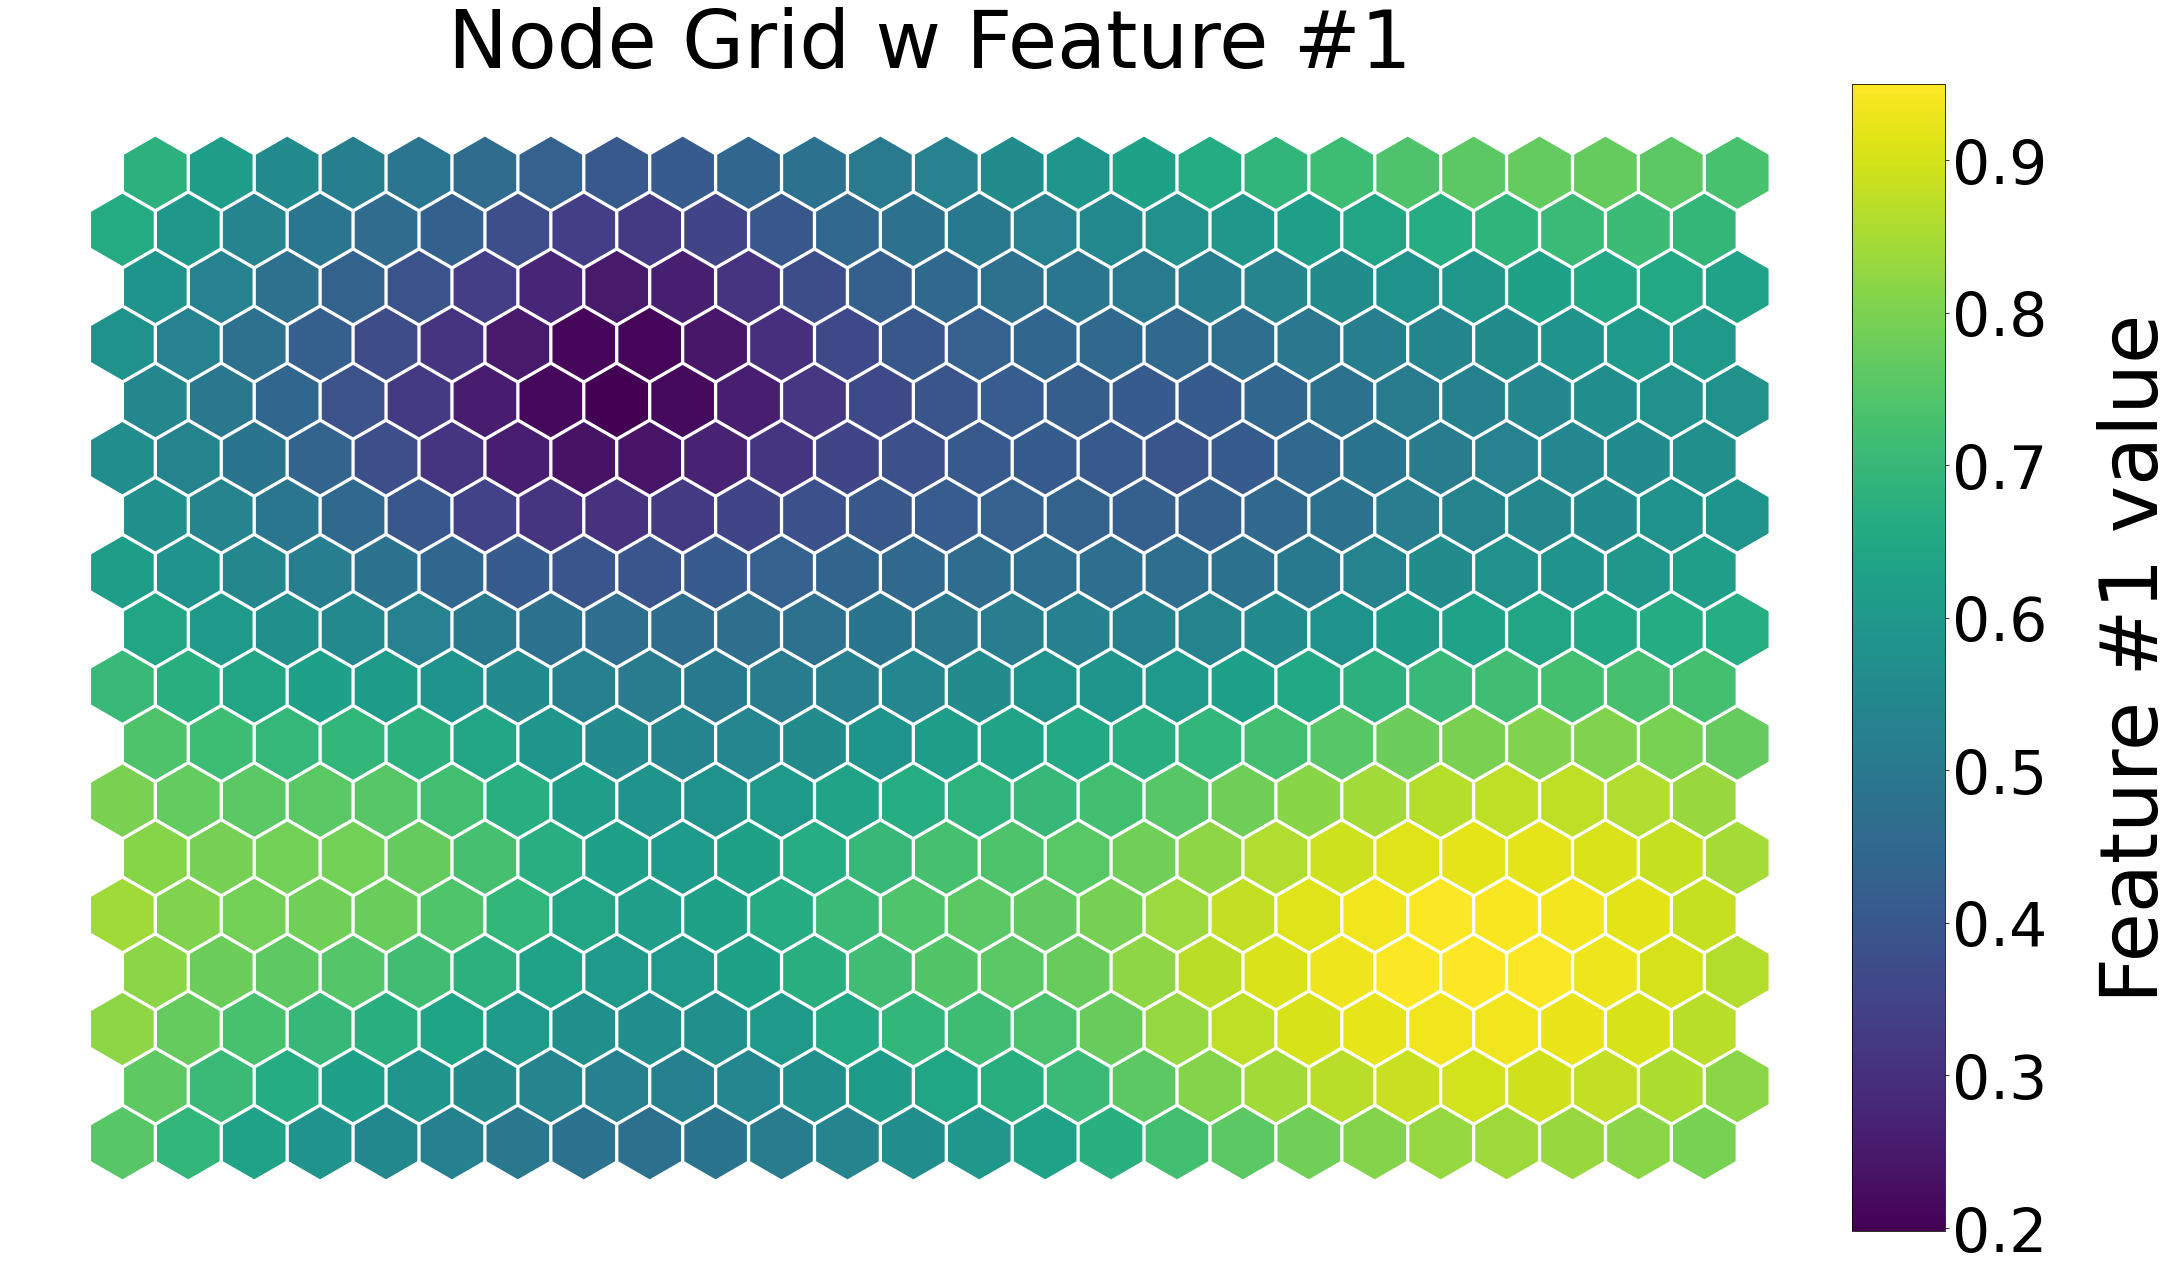

In [38]:
net.nodes_graph(colnum=1)

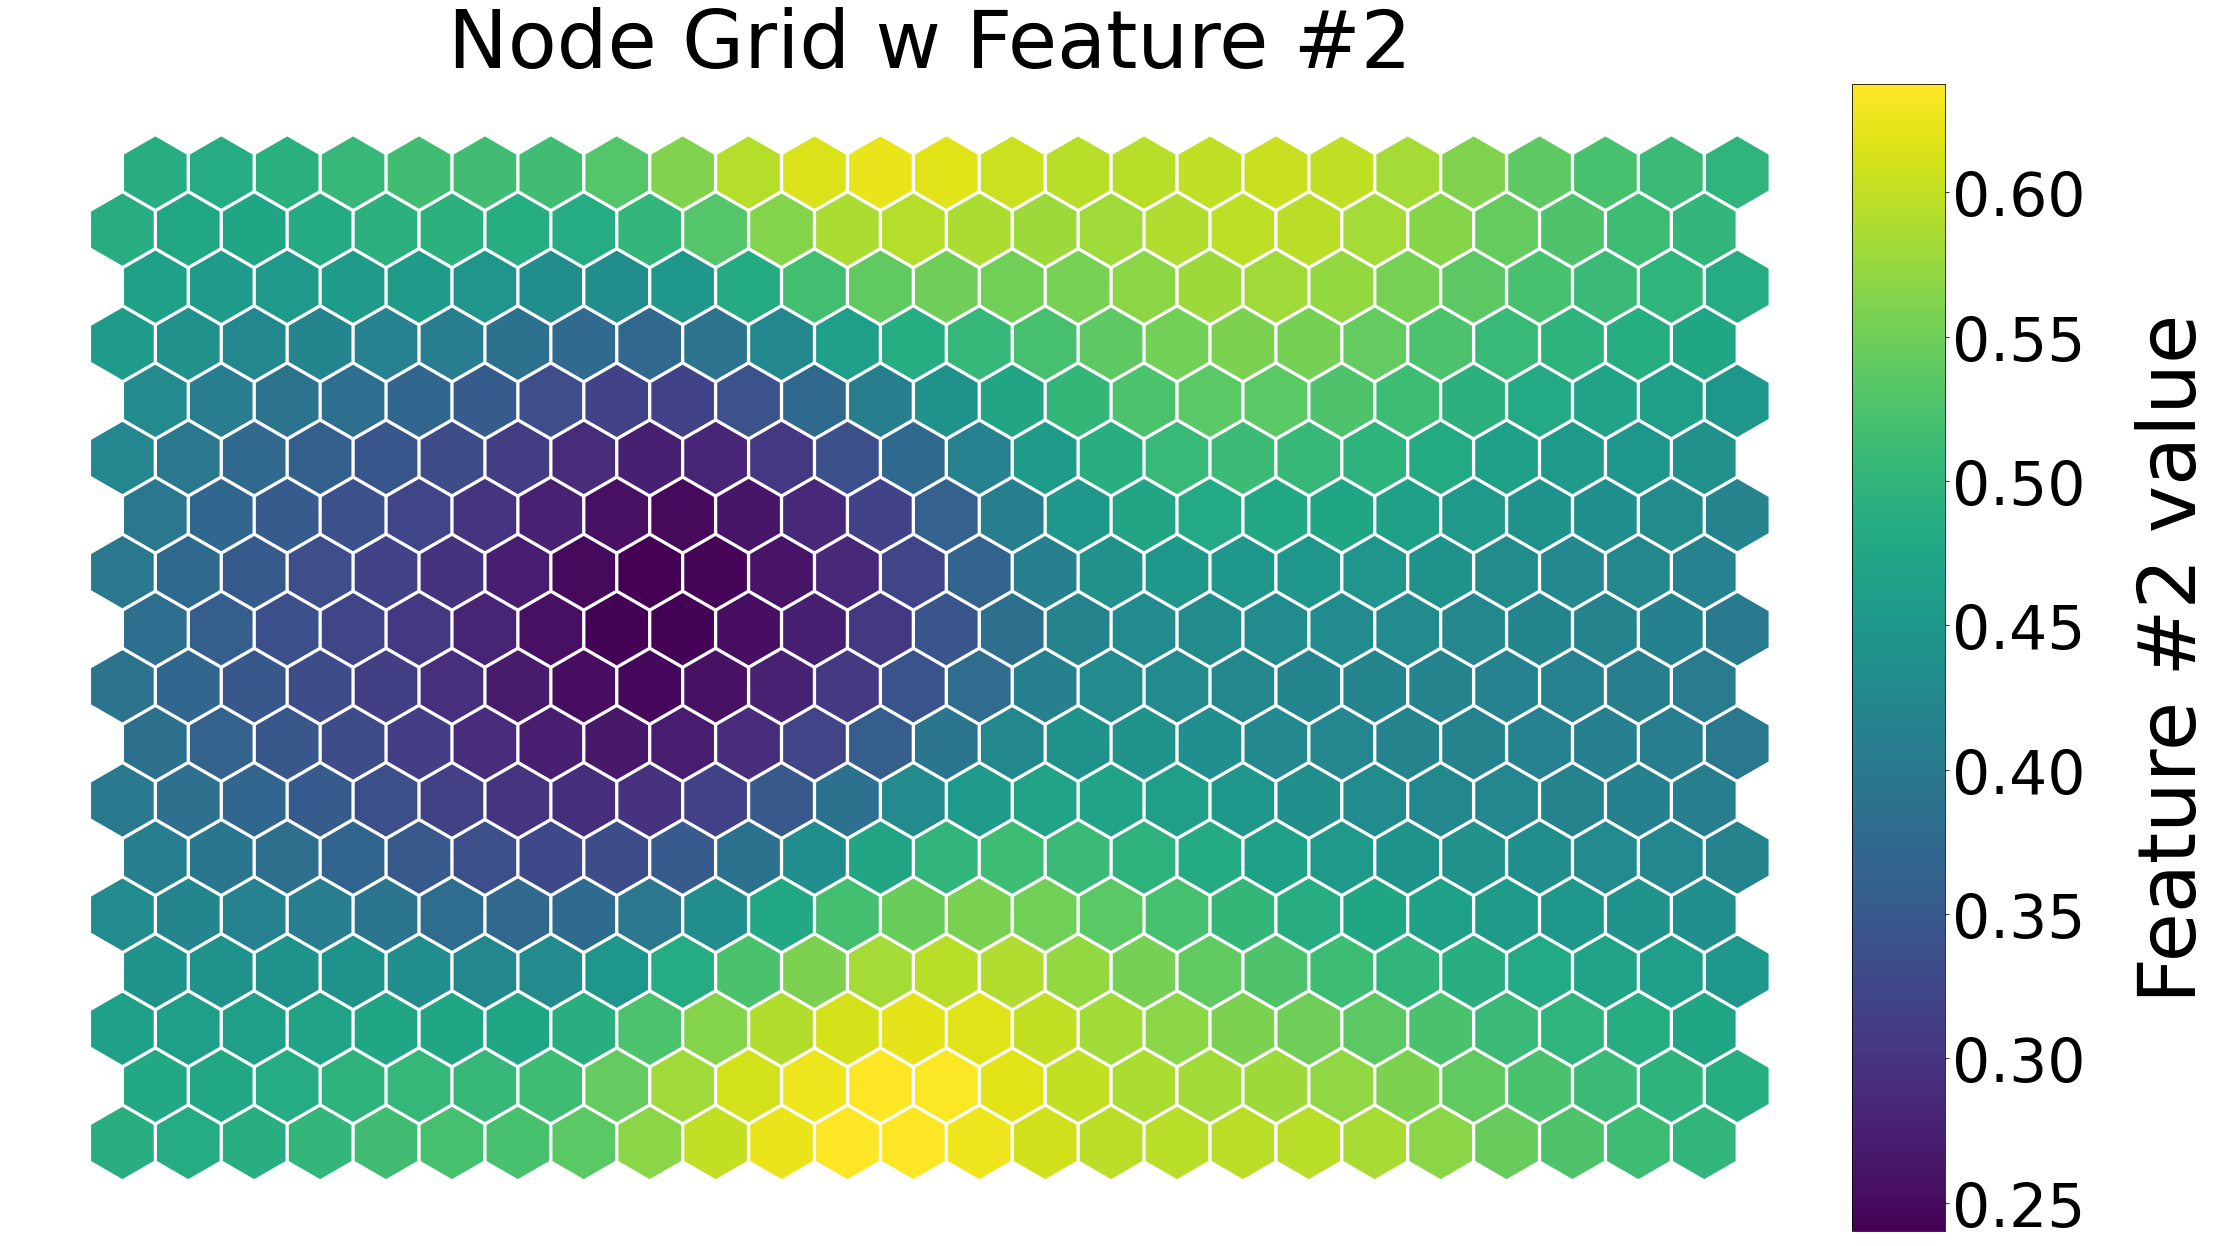

In [39]:
net.nodes_graph(colnum=2)

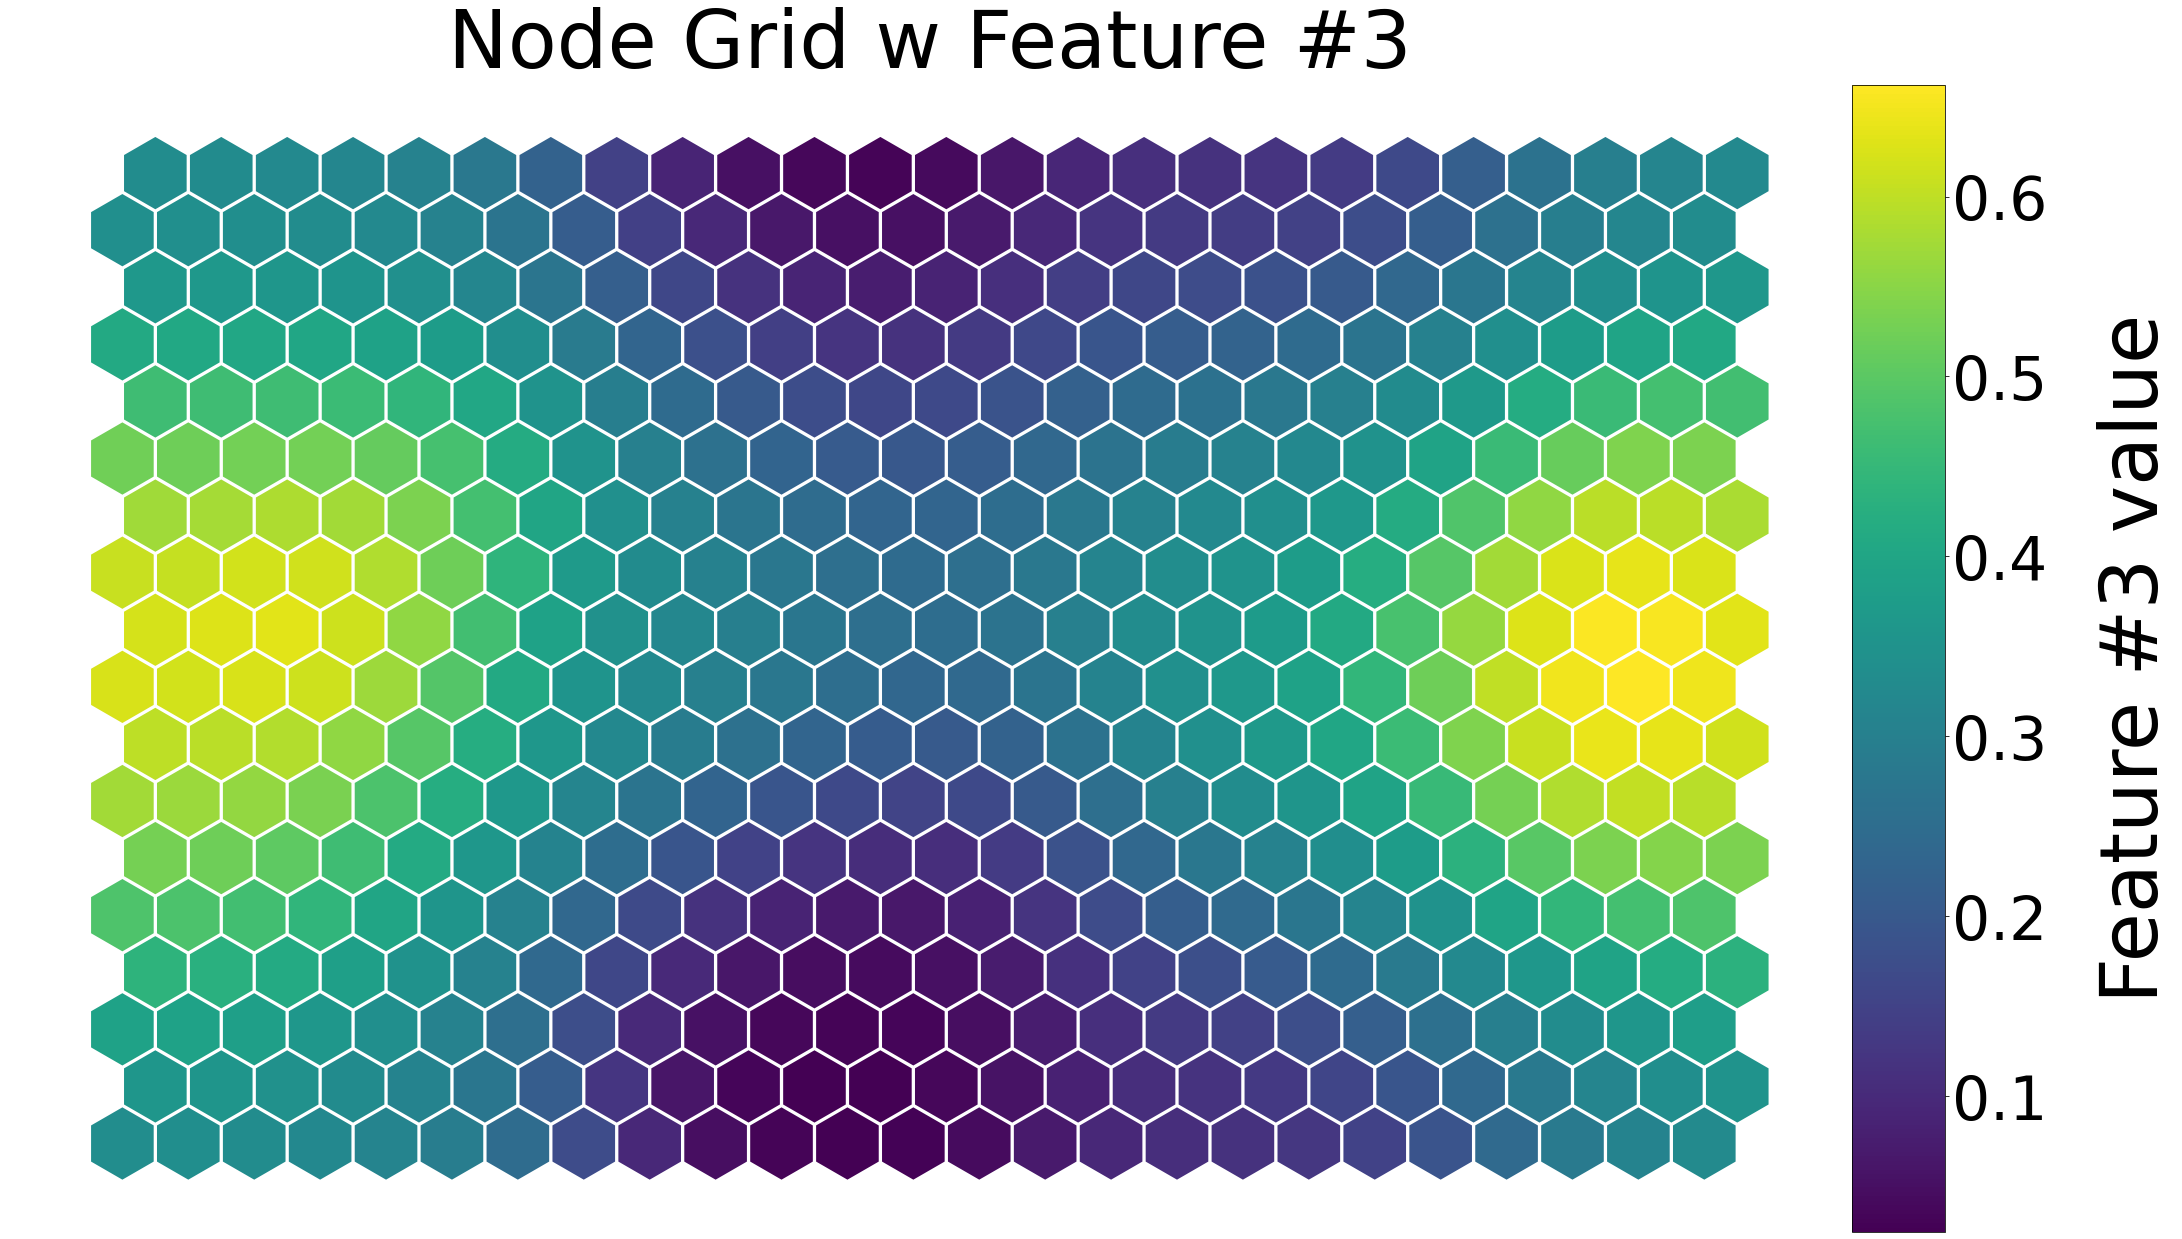

In [40]:
net.nodes_graph(colnum=3)

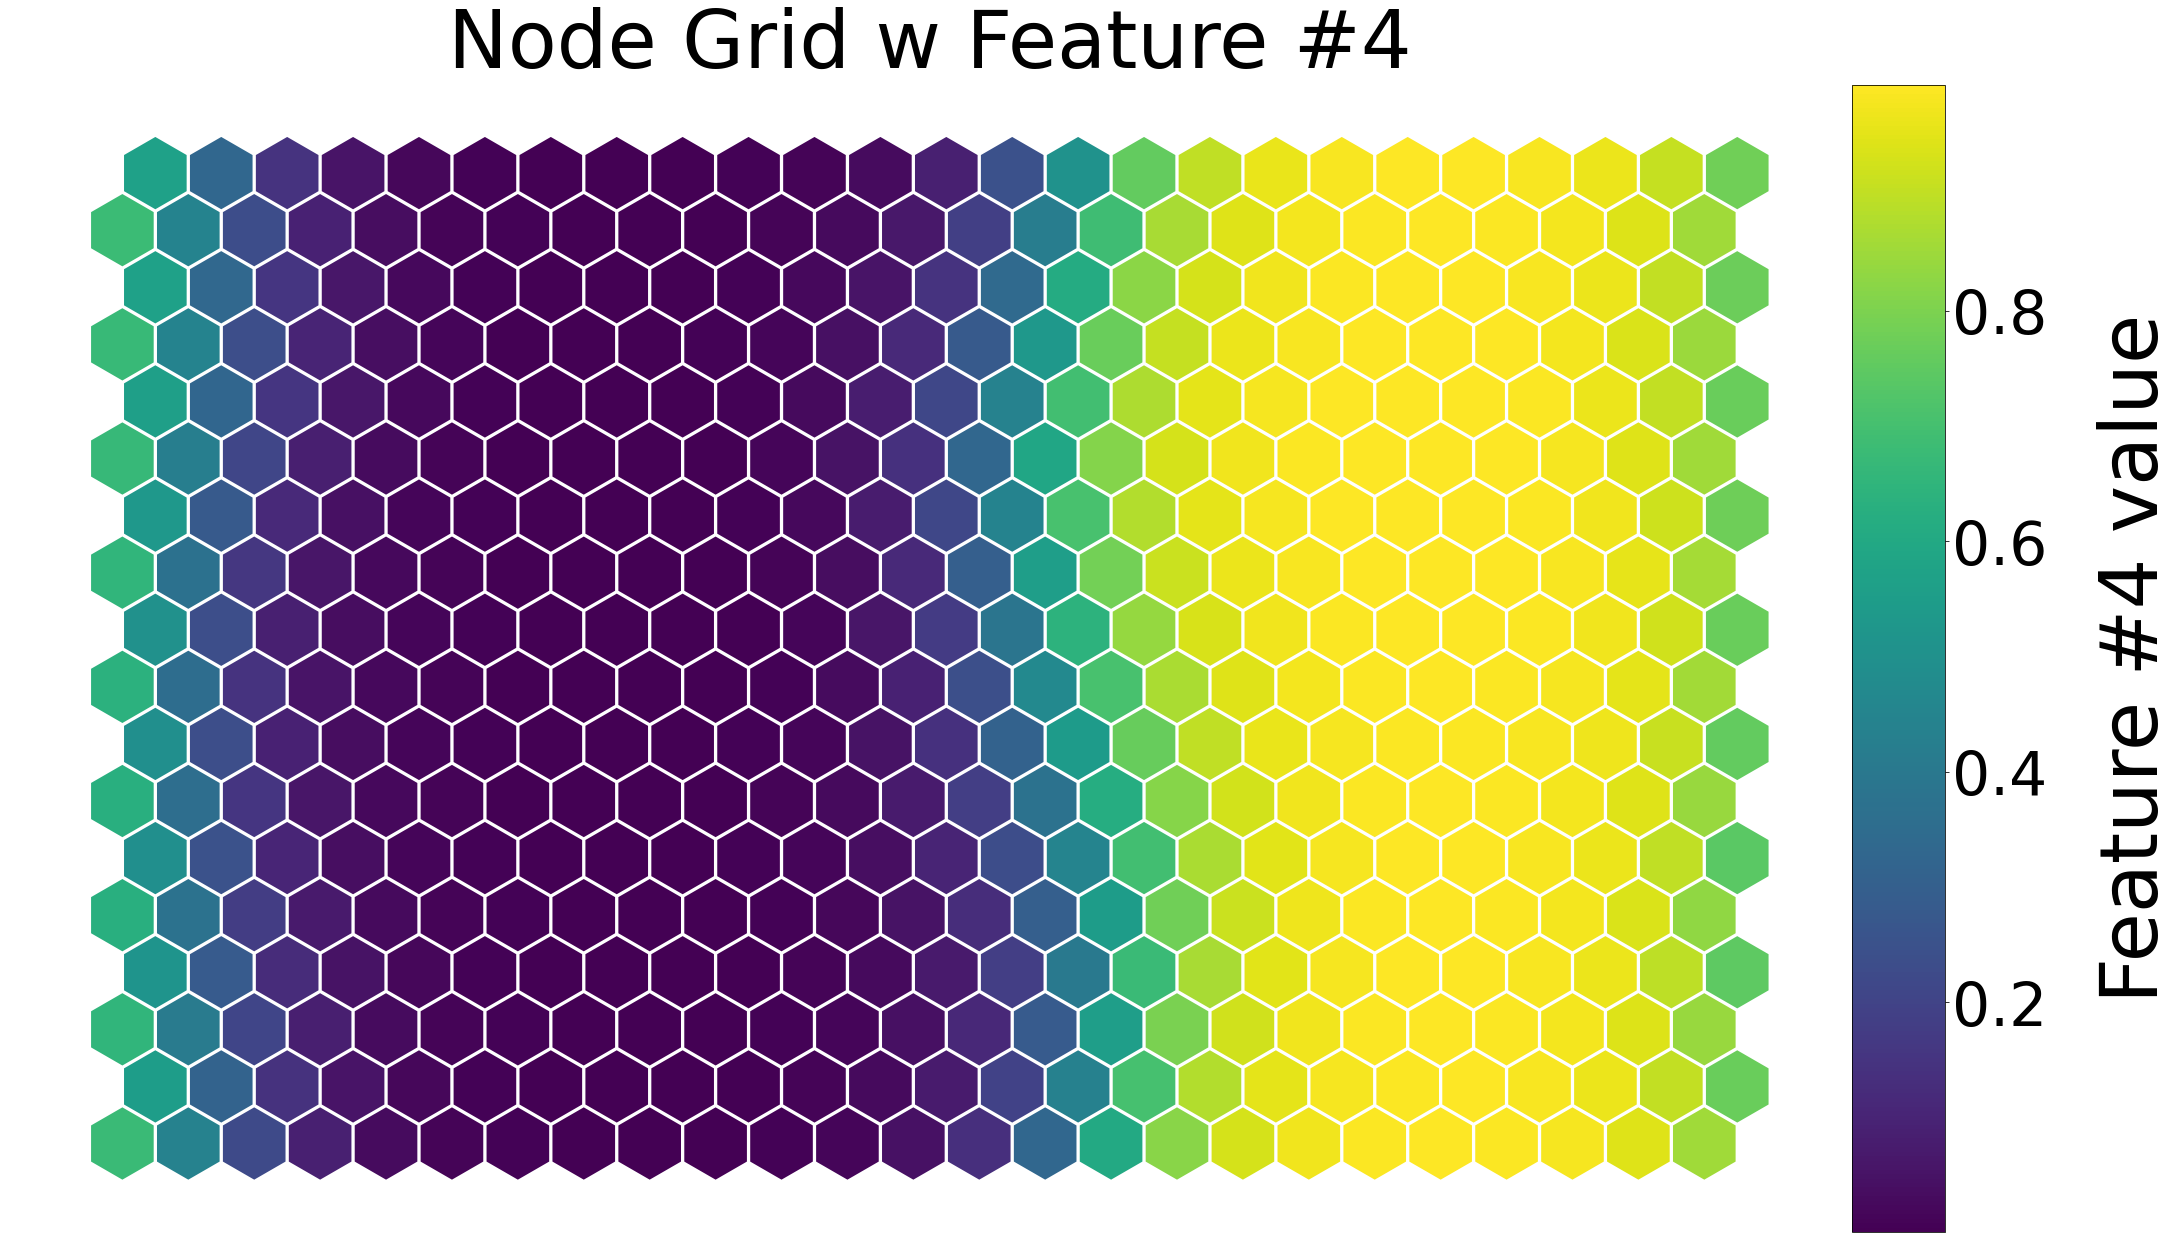

In [41]:
net.nodes_graph(colnum=4)

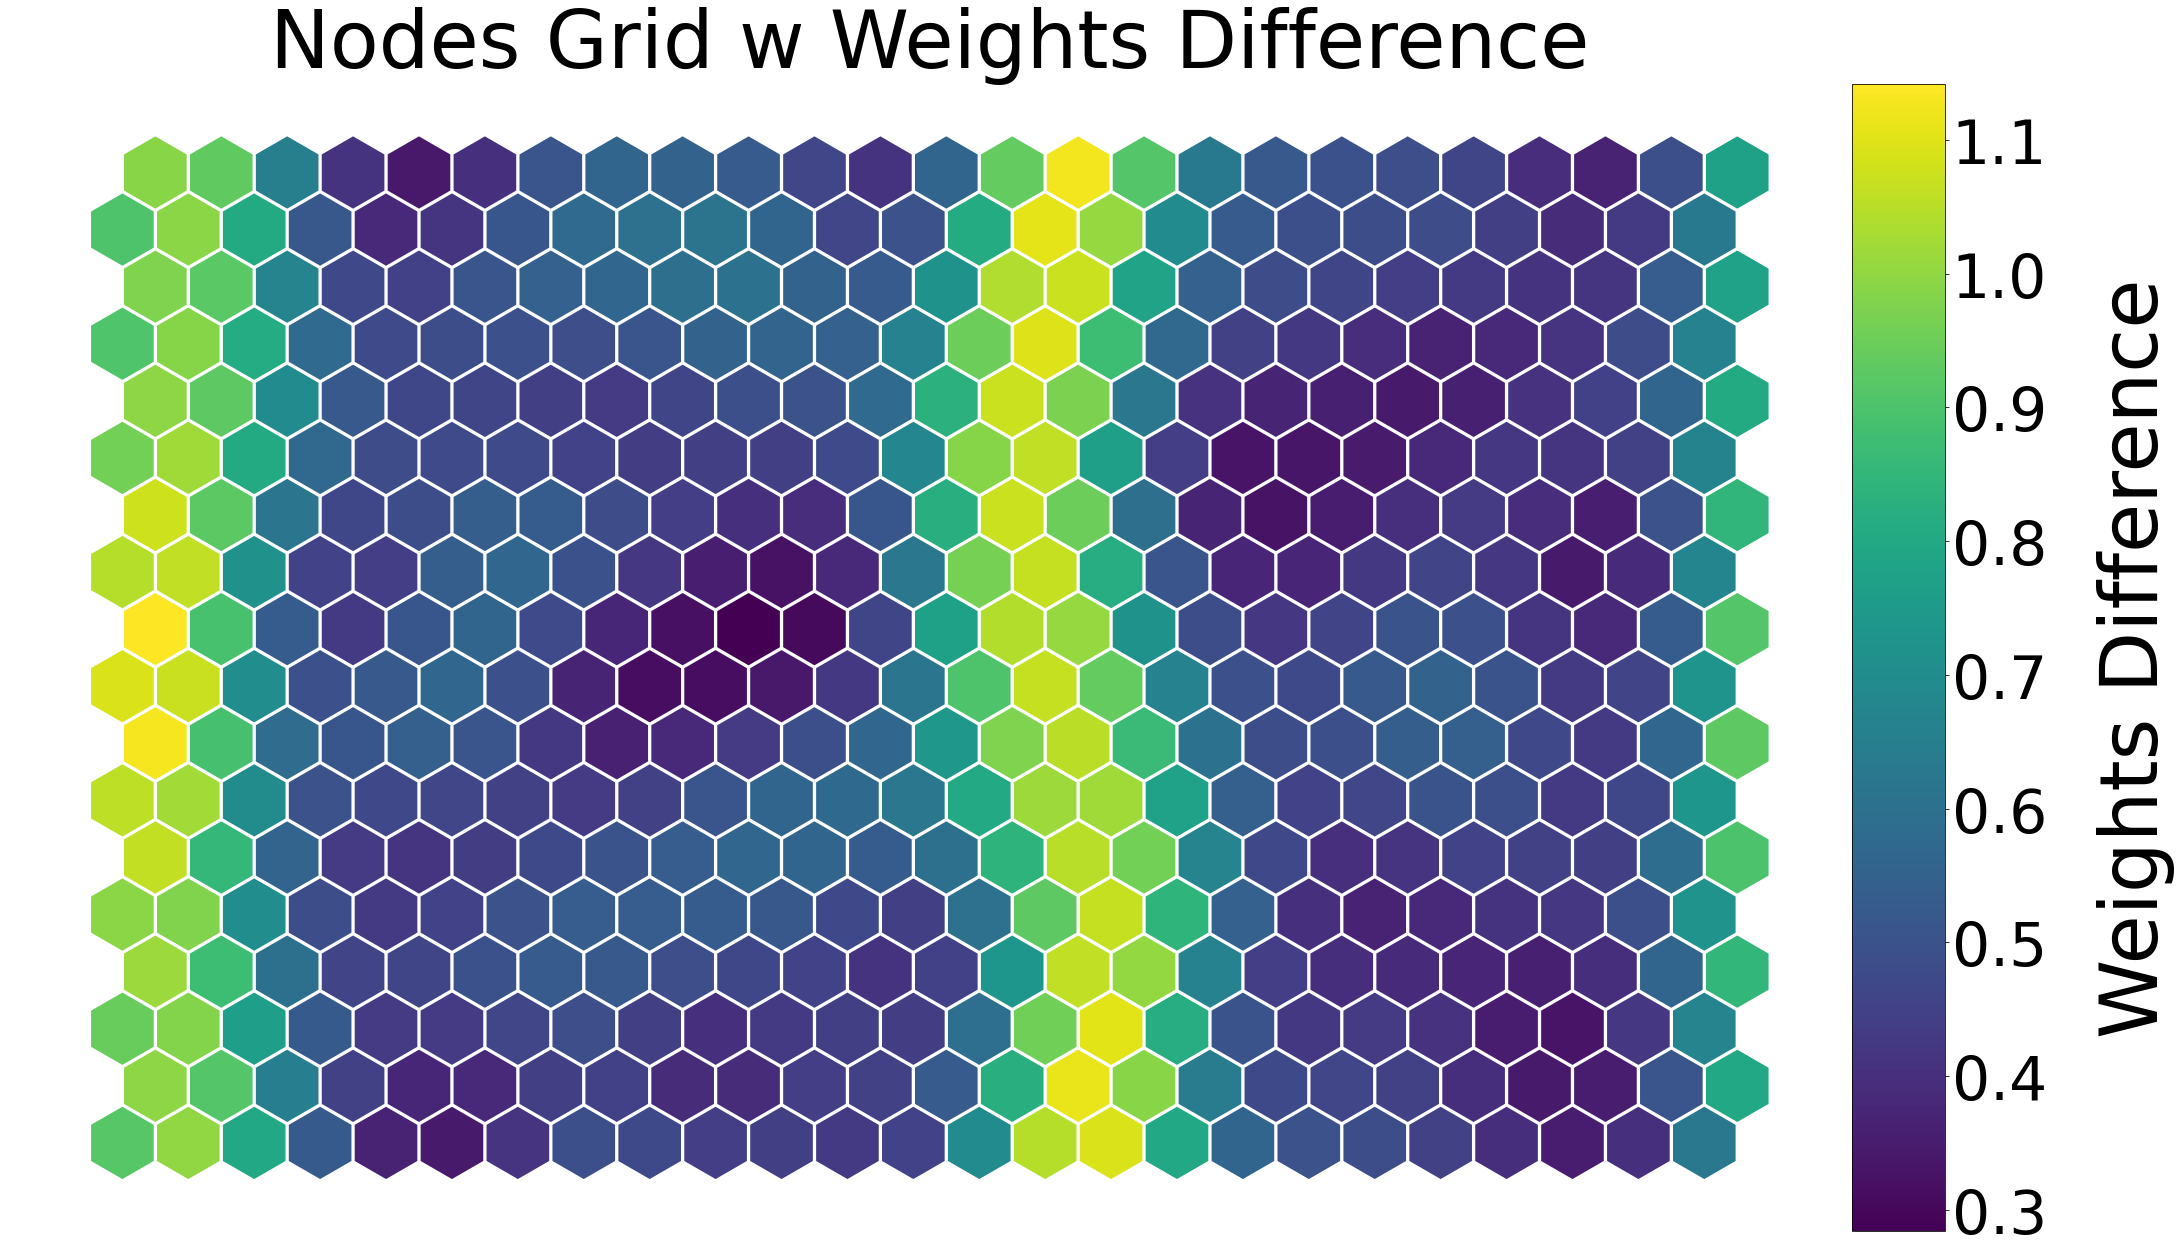

In [42]:
net.diff_graph()

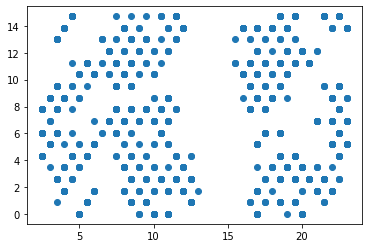

In [43]:
prj=np.array(net.project(X1))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [45]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(prj)

In [46]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc_opt,kmeans.labels_)

1.0

In [47]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km_opt,kmeans.labels_)

1.0

За всіма методами кластеризації ми можемо прийти до висновку що в наведеному наборі даних можна виділити 2 кластери. 1-й кластер - люди, старше 50 років, з освітою магістра с середнім рівнем доходу та більше (близько 50000 за рік) з однією дитиною, які є переважно споживачами вина. 2 кластер - молодь, яка має освіту бакалавра, дохід нижче середнього, без дітей і при здійсненні покупок на вино витрачають менше, ніж на продукти.